In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mutual-funds-and-etfs/ETFs.csv
/kaggle/input/mutual-funds-and-etfs/Mutual Funds.csv


In [2]:
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/mutual-funds-and-etfs/Mutual Funds.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (167,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_strategy,investment_type,size_type,currency,fund_net_annual_expense_ratio,category_net_annual_expense_ratio,asset_cash,asset_stocks,asset_bonds,asset_others,asset_preferred,asset_convertable,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,median_market_cap,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,bond_maturity,bond_duration,credit_us_government,credit_aaa,credit_aa,credit_a,credit_bbb,credit_bb,credit_b,credit_below_b,credit_other_ratings,net_asset_value,fund_yield,top10_holdings,fund_return_ytd,category_return_ytd,fund_return_1month,category_return_1month,fund_return_3months,category_return_3months,fund_return_1year,category_return_1year,fund_return_3years,category_return_3years,fund_return_5years,category_return_5years,fund_return_10years,category_return_10years,fund_return_2019,category_return_2019,fund_return_2018,category_return_2018,fund_return_2017,category_return_2017,fund_return_2016,category_return_2016,fund_return_2015,category_return_2015,fund_return_2014,category_return_2014,fund_return_2013,category_return_2013,fund_return_2012,category_return_2012,fund_return_2011,category_return_2011,fund_return_2010,category_return_2010,years_up,years_down,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,fund_return_2019_q3,fund_return_2019_q2,fund_return_2019_q1,fund_return_2018_q4,fund_return_2018_q3,fund_return_2018_q2,fund_return_2018_q1,fund_return_2017_q4,fund_return_2017_q3,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,fund_return_2014_q4,fund_return_2014_q3,fund_return_2014_q2,fund_return_2014_q1,fund_return_2013_q4,fund_return_2013_q3,fund_return_2013_q2,fund_return_2013_q1,fund_return_2012_q4,fund_return_2012_q3,fund_return_2012_q2,fund_return_2012_q1,fund_return_2011_q4,fund_return_2011_q3,fund_return_2011_q2,fund_return_2011_q1,fund_return_2010_q4,fund_return_2010_q3,fund_return_2010_q2,fund_return_2010_q1,quarters_up,quarters_down,fund_alpha_3years,category_alpha_3years,fund_alpha_5years,category_alpha_5years,fund_alpha_10years,category_alpha_10years,fund_beta_3years,category_beta_3years,fund_beta_5years,category_beta_5years,fund_beta_10years,category_beta_10years,fund_mean_annual_return_3years,category_mean_annual_return_3years,fund_mean_annual_return_5years,category_mean_annual_return_5years,fund_mean_annual_return_10years,category_mean_annual_return_10years,fund_r_squared_3years,category_r_squared_3years,fund_r_squared_5years,category_r_squared_5years,fund_r_squared_10years,category_r_squared_10years,fund_standard_deviation_3years,category_standard_deviation_3years,fund_standard_deviation_5years,category_standard_deviation_5years,fund_standard_deviation_10years,category_standard_deviation_10years,fund_sharpe_ratio_3years,category_sharpe_ratio_3years,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,2007-07-29,World Allocation,3.0,3.0,3.0,"The investment seeks total return in excess of inflation through capital growth and current income. The fund will invest at least 80% of its net assets, plus the amount of any borrowings for investment purposes, in a combination of investments that the Advisor believes offer exposure to ""real assets."" It generally invests between 25% and 75% of fund assets in securities of foreign issuers, i

In [5]:
df.shape

(24821, 173)

In [6]:
# definition funds whose description of investment strategy includes 'quantitative' as quant funds
print('number of funds:', df['fund_symbol'].nunique())
df['quant'] = (df['investment_strategy'].str.contains('quantitative')).astype(int)
print('number of quant funds:', df[df.quant==1]['fund_symbol'].nunique())

number of funds: 24821
number of quant funds: 443


In [7]:
print('number of fund companies: ', df['fund_family'].nunique())
print('number of fund companies running at least one quant fund:',
      df[df.quant==1]['fund_family'].nunique())
print('the fund companies running at least one quant fund are listed below:\n',
      df[df.quant==1]['fund_family'].value_counts())

number of fund companies:  722
number of fund companies running at least one quant fund: 51
the fund companies running at least one quant fund are listed below:
 BlackRock                                  129
American Century Investments                62
BNY Mellon                                  20
PGIM Funds (Prudential)                     20
New York Life Investment Management LLC     20
Neuberger Berman                            14
American Beacon                             14
Goldman Sachs                               13
Crossmark Steward Funds                     12
Franklin Templeton Investments              10
Redwood                                      9
Carillon Family of Funds                     7
Hennessy                                     6
Lazard                                       6
Copeland Funds                               6
Vanguard                                     5
PIMCO                                        5
Harbor                                 

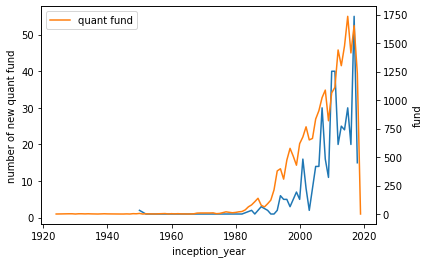

In [8]:
# number of new funds do not increase as steady as average funds
df['inception_date'] = pd.to_datetime(df.inception_date)
df['inception_year'] = df['inception_date'].dt.year
ax = df[df.quant==1].groupby('inception_year')['fund_symbol'].count().plot(label='quant fund')
ax1 = df.groupby('inception_year')['fund_symbol'].count().plot(secondary_y=True,label = 'fund')
ax.set_ylabel('number of new quant fund')
ax1.set_ylabel('fund')
plt.legend(['quant fund','fund'])
plt.show()

In [9]:
# quant funds: more on blend, and large

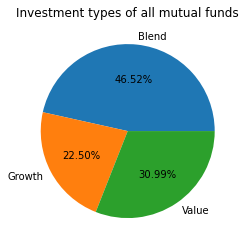

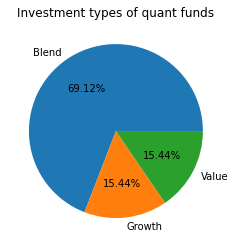

In [10]:
plt.figure(0)
temp = df.groupby('investment_type')['fund_symbol'].count().to_frame()
plt.pie(temp.fund_symbol,labels=temp.index,autopct='%.2f%%')
plt.title('Investment types of all mutual funds')
plt.figure(1)
temp = df[df.quant==1].groupby('investment_type')['fund_symbol'].count().to_frame()
plt.pie(temp.fund_symbol,labels=temp.index,autopct='%.2f%%')
plt.title('Investment types of quant funds')
plt.show()

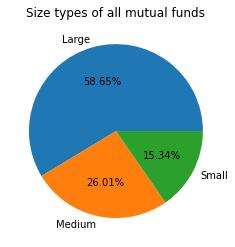

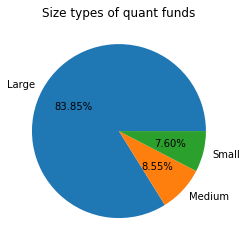

In [11]:
plt.figure(0)
temp = df.groupby('size_type')['fund_symbol'].count().to_frame()
plt.pie(temp.fund_symbol,labels=temp.index,autopct='%.2f%%')
plt.title('Size types of all mutual funds')
plt.figure(1)
temp = df[df.quant==1].groupby('size_type')['fund_symbol'].count().to_frame()
plt.pie(temp.fund_symbol,labels=temp.index,autopct='%.2f%%')
plt.title('Size types of quant funds')
plt.show()

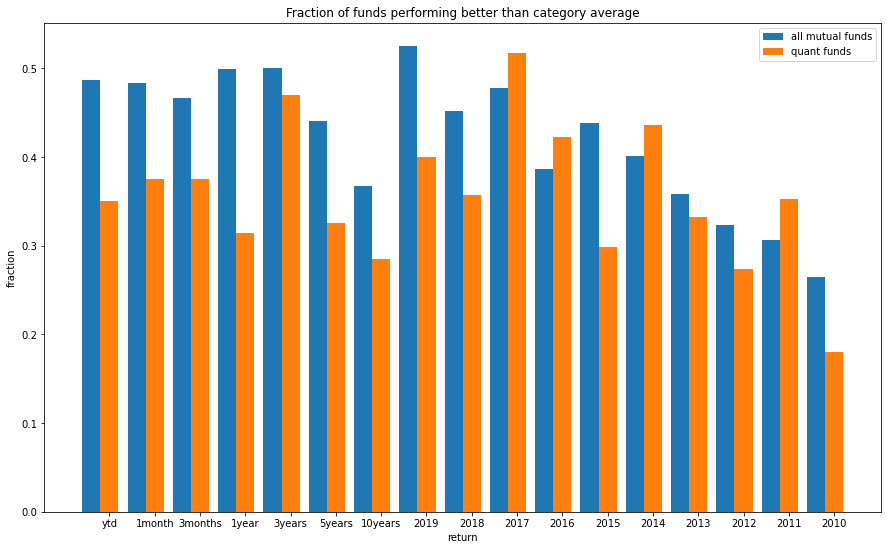

In [12]:
# the fraction of quant funds performing better than category is lower \
# than the fraction of total mutual funds performing better than category
pct_fund_better_than_category = []
pct_quant_fund_better_than_category = []
return_var = ['ytd','1month','3months','1year','3years','5years','10years',
            '2019','2018','2017','2016','2015','2014','2013','2012','2011','2010']
for var in return_var:
    df['fund return '+ var + ' > category'] = (df['fund_return_'+var] > df['category_return_'+var]).astype(int)
    pct_fund_better_than_category.append(
        df['fund return '+ var + ' > category'].mean())
    pct_quant_fund_better_than_category.append(
        df[df.quant==1]['fund return '+ var + ' > category'].mean())
    

fig,ax = plt.subplots(figsize=(15,9))
index = np.arange(len(return_var))

bar_width = 0.4
ax1 = plt.bar(index,pct_fund_better_than_category,width=bar_width,
             label='all mutual funds')
ax2 = plt.bar(index+bar_width,pct_quant_fund_better_than_category,
              width=bar_width,label='quant funds')

plt.xlabel('return')
plt.ylabel('fraction')
plt.xticks(index+bar_width,return_var)
plt.title('Fraction of funds performing better than category average')
plt.legend()
plt.show()

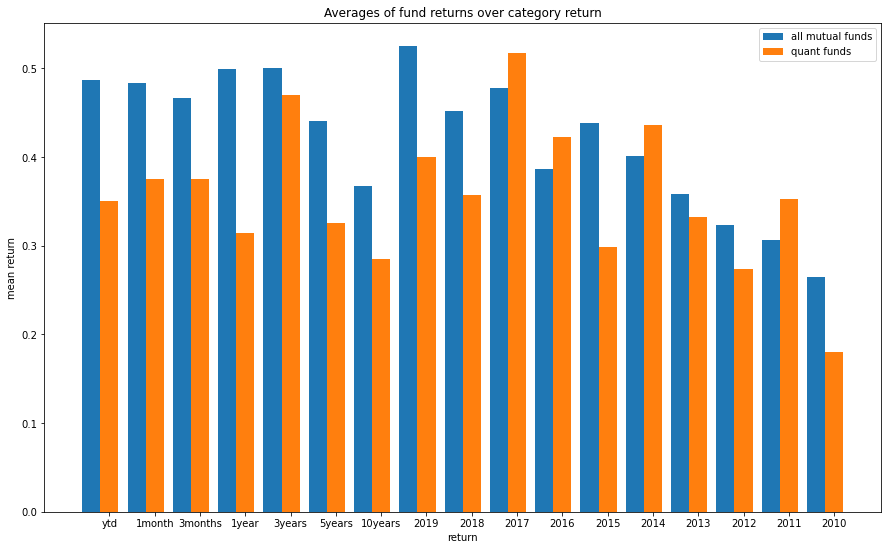

In [13]:
# on average, quant funds have a lower (fund return-category return)
mean_fund_ret_minus_category = []
mean_quant_fund_ret_minus_category = []
return_var = ['ytd','1month','3months','1year','3years','5years','10years',
            '2019','2018','2017','2016','2015','2014','2013','2012','2011','2010']
for var in return_var:
    df['fund return '+ var + ' minus category'] = \
    df['fund_return_'+var] - df['category_return_'+var]

    # quant funds have a 

    mean_fund_ret_minus_category.append(
        df['fund return '+ var + ' minus category'].mean())
    mean_quant_fund_ret_minus_category.append(
        df[df.quant==1]['fund return '+ var + ' minus category'].mean())
    

fig,ax = plt.subplots(figsize=(15,9))
index = np.arange(len(return_var))

bar_width = 0.4
ax1 = plt.bar(index,pct_fund_better_than_category,width=bar_width,
             label='all mutual funds')
ax2 = plt.bar(index+bar_width,pct_quant_fund_better_than_category,
              width=bar_width,label='quant funds')

plt.xlabel('return')
plt.ylabel('mean return')
plt.xticks(index+bar_width,return_var)
plt.title('Averages of fund returns over category return')
plt.legend()
plt.show()

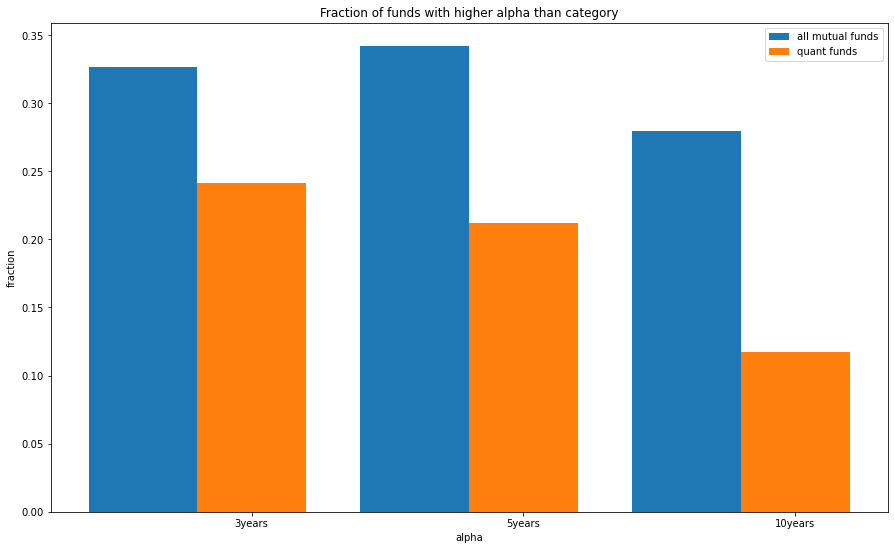

In [14]:
fraction_fund_alpha_larger_than_category = []
fraction_quant_fund_alpha_larger_than_category = []
alpha_var = ['3years','5years','10years']
for var in alpha_var:
    df['fund alpha '+ var + ' > category'] = \
    (df['fund_alpha_'+var] > df['category_alpha_'+var]).astype(int)
    
    fraction_fund_alpha_larger_than_category.append(
        df['fund alpha '+ var + ' > category'].mean())
    fraction_quant_fund_alpha_larger_than_category.append(
        df[df.quant==1]['fund alpha '+ var + ' > category'].mean())
    

fig,ax = plt.subplots(figsize=(15,9))
index = np.arange(len(alpha_var))

bar_width = 0.4
ax1 = plt.bar(index,fraction_fund_alpha_larger_than_category,width=bar_width,
             label='all mutual funds')
ax2 = plt.bar(index+bar_width,fraction_quant_fund_alpha_larger_than_category,
              width=bar_width,label='quant funds')

plt.xlabel('alpha')
plt.ylabel('fraction')
plt.xticks(index+bar_width,alpha_var)
plt.title('Fraction of funds with higher alpha than category')
plt.legend()
plt.show()

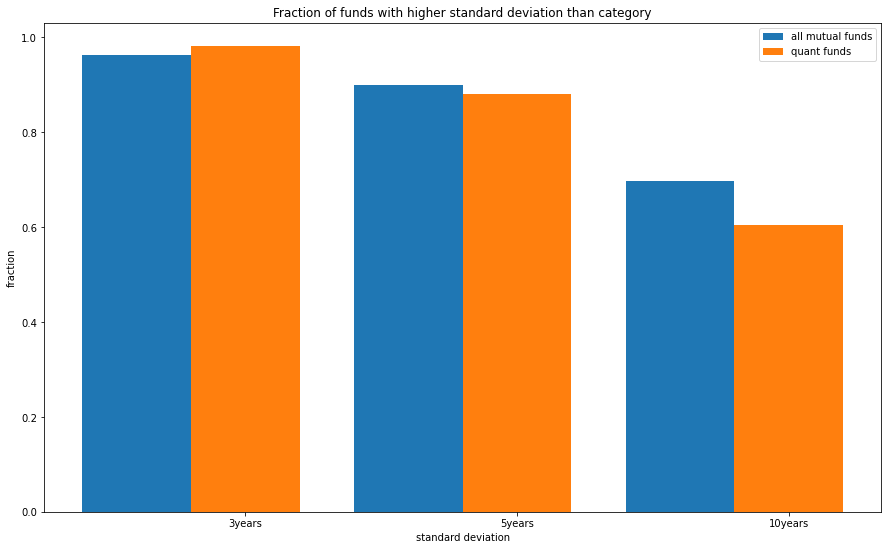

In [15]:
# quant funds have slightly lower standard deviation in 5years and 10years
fraction_fund_std_larger_than_category = []
fraction_quant_fund_std_larger_than_category = []
std_var = ['3years','5years','10years']
for var in std_var:
    df['fund standard deviation '+ var + ' > category'] = (df['fund_standard_deviation_'+var] > df['category_standard_deviation_'+var]).astype(int)
    
    fraction_fund_std_larger_than_category.append(
        df['fund standard deviation '+ var + ' > category'].mean())
    fraction_quant_fund_std_larger_than_category.append(
        df[df.quant==1]['fund standard deviation '+ var + ' > category'].mean())
    

fig,ax = plt.subplots(figsize=(15,9))
index = np.arange(len(std_var))

bar_width = 0.4
ax1 = plt.bar(index,fraction_fund_std_larger_than_category,width=bar_width,
             label='all mutual funds')
ax2 = plt.bar(index+bar_width,fraction_quant_fund_std_larger_than_category,
              width=bar_width,label='quant funds')

plt.xlabel('standard deviation')
plt.ylabel('fraction')
plt.xticks(index+bar_width,std_var)
plt.title('Fraction of funds with higher standard deviation than category')
plt.legend()
plt.show()

In [16]:
# Do not use sharpe ratio variable. Because category sharpe ratio (many zeros) here are not consistent with category return (non-zero and large than risk free).
# some treynor ratio is type of 'object', probably because of missing values

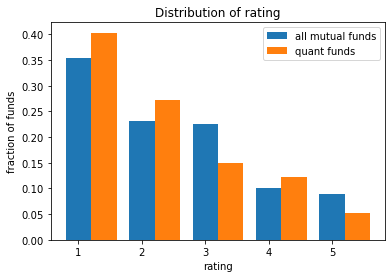

<Figure size 432x288 with 0 Axes>

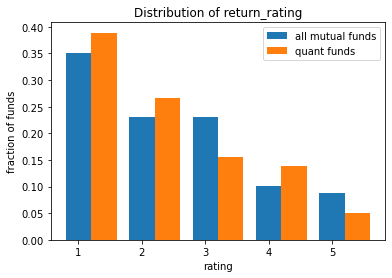

<Figure size 432x288 with 0 Axes>

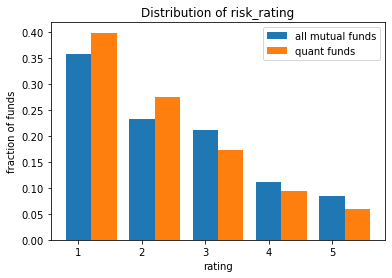

<Figure size 432x288 with 0 Axes>

In [17]:
# quant funds concentrate more on lower ratings (1 or 2), i.e.lower return and higher risk
rating = ['rating','return_rating','risk_rating']
for var in rating:                        
                              
    fig,ax = plt.subplots()

    index = np.arange(5) # rating is from 1 to 5
    bar_width=0.4


    ax = plt.bar(index+1,df[var].value_counts(normalize=True).to_frame()[var],
            width = bar_width,label='all mutual funds')
    ax1 = plt.bar(index+1+bar_width,df[df.quant==1][var].value_counts(normalize=True).to_frame()[var],
            width = bar_width,label='quant funds')
    
    plt.xlabel('rating')
    plt.ylabel('fraction of funds')
    plt.title('Distribution of ' + var)
    plt.legend()

    plt.show()
    plt.clf()

In [18]:
# on average, quant funds are more expensive
df['fund expense minus category'] = \
df['fund_net_annual_expense_ratio'] - df['category_net_annual_expense_ratio']

print('average (fund expense-category expense)of all funds:',
     df['fund expense minus category'].mean())
print('average (fund expense-category expense)of quant funds:',
     df[df.quant==1]['fund expense minus category'].mean())

average (fund expense-category expense)of all funds: 0.09984563298537082
average (fund expense-category expense)of quant funds: 0.17419864559819434
